In [3]:
import pandas as pd
from scipy.spatial import ConvexHull, Delaunay
import numpy as np
import random
import matplotlib.pyplot as plt
import cv2
import cvxopt
from trimesh_uno import TriMesh
from skimage.io import imread
from LoCoPalette.ConvexHull_Simplification.SILD_convexhull_simplification import *
import itertools
import os
import json

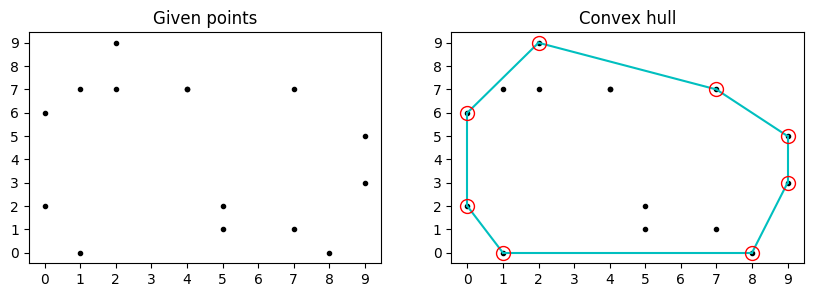

In [2]:
points = np.random.randint(0, 10, size=(15, 2))  # Random points in 2-D

hull = ConvexHull(points)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))

for ax in (ax1, ax2):
    ax.plot(points[:, 0], points[:, 1], '.', color='k')
    if ax == ax1:
        ax.set_title('Given points')
    else:
        ax.set_title('Convex hull')
        for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'c')
        ax.plot(points[hull.vertices, 0], points[hull.vertices, 1], 'o', mec='r', color='none', lw=1, markersize=10)
    ax.set_xticks(range(10))
    ax.set_yticks(range(10))
plt.show()

In [25]:
def get_faces_vertices(hull):
    hvertices=hull.points[hull.vertices]
    points_index=-1*np.ones(hull.points.shape[0],dtype=np.int32)
    points_index[hull.vertices]=np.arange(len(hull.vertices))
    #### start from index 1 in obj files!!!!!

    hfaces=np.array([points_index[hface] for hface in hull.simplices]) + 1


    #### to make sure each faces's points are countclockwise order.
    for index in range(len(hfaces)):
        face=hvertices[hfaces[index]-1]
        normals=hull.equations[index,:3]
        p0=face[0]
        p1=face[1]
        p2=face[2]

        n=np.cross(p1-p0,p2-p0)
        if np.dot(normals,n)<0:
            hfaces[index][[1,0]]=hfaces[index][[0,1]]

    #print('v: ', hvertices[0])


    #print('h: ', hfaces)
    hfaces = hfaces.astype(np.int32)
    return hvertices, hfaces

In [26]:
points = np.random.randint(0, 10, size=(15, 3))  # Random points in 2-D

hull = ConvexHull(points)

In [27]:
hvertices, hfaces = get_faces_vertices(hull)

In [28]:
points_index=-1*np.ones(hull.points.shape[0],dtype=np.int32)
points_index[hull.vertices]=np.arange(len(hull.vertices))
#### start from index 1 in obj files!!!!!

hfaces=np.array([points_index[hface] for hface in hull.simplices])

In [29]:
mesh = TriMesh.FromVertexFace_to_MeshObj(hvertices, hfaces )

ValueError: triangles are indices into the points and must be in the range 0 <= i < 10 but found value -1

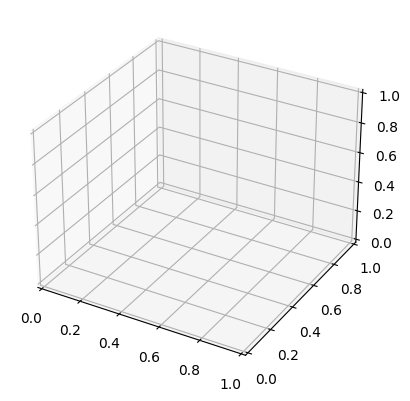

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(mesh.vs[:, 0], mesh.vs[:,1], triangles=mesh.faces, Z=mesh.vs[:,2])
ax.view_init(140, 30)
plt.show()

In [263]:
mesh.show()

In [65]:
points = np.random.randint(0, 255, size=(12, 3))

In [66]:
points

array([[ 21, 240, 204],
       [ 96, 194, 240],
       [ 48,  19, 109],
       [181,  58, 130],
       [101, 203, 163],
       [  7, 125, 237],
       [ 85, 161, 213],
       [241, 142,   6],
       [141, 248, 243],
       [ 49,  55,  76],
       [132, 158, 182],
       [156, 142, 167]])

In [68]:
palette = get_palette(6,points,'')

Extracting palette...
original vertices number: 8
final vertices number: 6
Palette extracted.


In [69]:
palette

array([[ 21., 240., 204.],
       [181.,  58., 130.],
       [  7., 125., 237.],
       [241., 142.,   6.],
       [  1.,   1.,   1.],
       [  0.,   0.,   1.]])

In [70]:
palette = (palette / 255).reshape((1,-1,3))

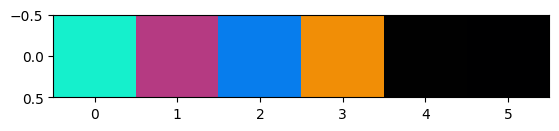

In [71]:
plt.imshow(palette)

In [5]:
img = imread(f'/Users/zhxzhang/DataspellProjects/Image_Dataset/test_image_dataset/nesi.png')

In [7]:
palette = get_palette(palette_size=6, img_arr=img,img_path='')

Extracting palette...
original vertices number: 120
final vertices number: 58
Palette extracted.


In [5]:
points = np.random.randint(0, 255, size=(40, 3))

In [4]:
hull = ConvexHull(points)

NameError: name 'points' is not defined

In [3]:
df = pd.read_csv('../Result/HSV/cities/treeandgrass/BuenosAires_filtered_rgb_meanfilter.csv')

In [4]:
lab = df.values[:,1:]

In [5]:
lab[:5]

array([[56., 34., 10.],
       [58., 47., 29.],
       [63., 50.,  5.],
       [52., 38., 27.],
       [62., 50., 38.]])

In [9]:
colors = np.array(newhull.points.clip(0.0,255.0).tolist())/255

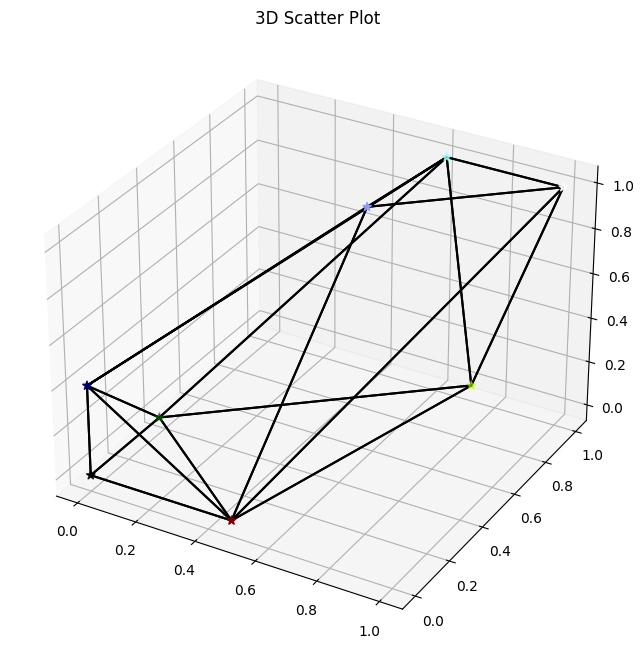

In [12]:
visualize_hull(newhull)

# Go small


In [2]:
import object_extract as oe

In [3]:
def labandlch_divideandcolor(color_number,start,end):
    cspace = end-start  # Total range
    segment_size = cspace / color_number

    print(segment_size)
    r_ranges = [[]for _ in range(len(start))]
    for i in range(len(start)):
        start_rgb = start[i]
        for j in range(color_number):
            start_rgb = start[i] + j * segment_size[i]
            end_rgb = start_rgb + segment_size[i]
            r_ranges[i].append([start_rgb, end_rgb])
            #if j != 0:
                #r_ranges[i].append([start_rgb+1, end_rgb])
            #else:
                #r_ranges[i].append([start_rgb, end_rgb])

        if end_rgb <end[i]:
            r_ranges[i].pop(-1)
            r_ranges[i].append([start_rgb,end[i]])

    lab_ranges = list(itertools.product(*r_ranges))
    #print(lab_ranges)
    colors = []
    for rgb_range in lab_ranges:
        l = rgb_range[0][0] + (rgb_range[0][1] -rgb_range[0][0]) /2
        a = rgb_range[1][0]+ (rgb_range[1][1] -rgb_range[1][0]) /2
        b = rgb_range[2][0] + (rgb_range[2][1] -rgb_range[2][0]) /2

        colors.append([l,a,b])

    color_labels = []
    colors = [[[i]] for i in colors]
    for i in range(1, len(colors) + 1):
        color_labels.append(f"color{i}")
    return lab_ranges,color_labels,colors

def color_plt(color_number,colors):
    cols = int(color_number/8)
    fig, ax = plt.subplots(figsize=(15, 4), nrows=8, ncols=cols)
    flag = 0
    for i in range(8):
        for j in range(cols):
            ax[i,j].imshow(colors[flag])
            ax[i,j].set_axis_off()
            flag +=1

    #fig.savefig('../Result/HSV/full_figure2.png')

    plt.show()

def range_upperandbottom(rgb_ranges):
    upper_list = []
    down_list = []
    for rgb_range in rgb_ranges:
        rgb_down = [rgb_range[0][0],rgb_range[1][0],rgb_range[2][0]]
        rgb_upper = [rgb_range[0][1],rgb_range[1][1],rgb_range[2][1]]

        upper_list.append(rgb_upper)
        down_list.append(rgb_down)
    down_np,upper_np = np.array(down_list),np.array(upper_list)
    return down_np,upper_np

In [4]:
lab_ranges,color_labels,colors = labandlch_divideandcolor(4,np.array([0,0,0]),np.array([255,255,255]))

[63.75 63.75 63.75]


In [5]:
down_np,upper_np = range_upperandbottom(lab_ranges)

In [6]:
def rgb_pixel_count(down_list,upper_list,rgb):
    counts = []
    for down,upper in zip(down_list,upper_list):
        dst = cv2.inRange(rgb, down, upper)
        count = np.sum(dst==255)

        counts.append(count)

    return np.array(counts).astype(np.int64) / np.sum(counts)

def city_multiobjs_object_extraction(semantic_img,original_img,lower,upper,threshold,down_list,upper_list):
    se_img = imread(semantic_img)
    #print(se_img.shape)
    masks = np.zeros((se_img.shape[0],se_img.shape[1]))
    for i in range(len(lower)):
        #print(lower[i],upper[i])
        masks += cv2.inRange(se_img, lower[i], upper[i])

    positions = np.where(masks == 255)
    lens = len(positions[0])
    if lens > threshold:
        selected_rgb = np.zeros((1,3))
        ori_img = imread(original_img)
        colors = ori_img[positions]
        colors = colors.reshape(-1,1,3)
        rgb_counts = rgb_pixel_count(down_list = down_list,
                                     upper_list = upper_list,
                                     rgb=colors)
        rgb_mean_0 = rgb_counts[rgb_counts > 0]
        #locate_hue = np.where(rgb_counts > np.sqrt(rgb_mean_0.min()))

        locate_hue = np.where(rgb_counts > rgb_mean_0.mean())
        dd_list = down_list[locate_hue]
        uu_list = upper_list[locate_hue]
        for dd,uu in zip(dd_list,uu_list):
            mask = cv2.inRange(colors, dd, uu)
            position = np.where(mask ==255)
            color = colors[position]
            selected_rgb = np.concatenate((selected_rgb,color))
        return 1,selected_rgb[1:]
    else:
        return 0,0

def city_multiobjs_feature_extract(objs,map_dict,img_se_dir,img_ori_dir,minus,add,threshold,down_list,upper_list):
    lower  = []
    upper = []
    for obj in objs:
        rgb_value = map_dict[obj]
        lower.append(rgb_value - minus)
        upper.append(rgb_value + add)
    #print(lower)
    #print(upper)
    #cities = os.listdir(original_dir)
    features_list = []
    name_list = []
    _,rgb = city_multiobjs_object_extraction(semantic_img=img_se_dir,
                                              original_img=img_ori_dir,
                                              lower=lower,
                                              upper=upper,
                                              threshold=threshold,
                                            down_list=down_list,
                                                 upper_list=upper_list)


    if _ != 0:

        features_list.append(rgb)
        #cities_list.append(city)
        #name_list.append(name)

    return features_list

In [7]:
path2csv = f'../Semantic_color_map/color_coding_semantic_segmentation_classes - Sheet1.csv'
object2color = oe.get_rgbandclass(path2csv)
minus = np.array([3, 3, 3])
add = np.array([4, 4, 4])

In [10]:
folder_path1 = "E:/dataset/color_harmony_dataset/5/LosAngeles/Original/LosAngeles_0000805_2019_04_254_34.05413661704147_-118.2561985634712_jkRksha1SNsj0H6UjgY5UA.jpg"
folder_path2 = "E:/dataset/color_harmony_dataset/5/LosAngeles/Semantic/LosAngeles_0000805_2019_04_254_34.05413661704147_-118.2561985634712_jkRksha1SNsj0H6UjgY5UA.jpg"

In [11]:
features_list = city_multiobjs_feature_extract(
                                                objs=['tree','grass'],
                                                     map_dict=object2color,
    img_se_dir=folder_path2,
    img_ori_dir=folder_path1,
                                                 minus=minus,
                                                 add = add,
                                                 threshold=0,
    down_list = down_np,
    upper_list= upper_np
                                                 )

In [12]:
features_list[0].shape

(56341, 3)

In [13]:
df = pd.DataFrame(features_list[0])

In [67]:
df.to_csv('../LoCoPalette_Result/LosAngeles_Result/LosAngeles_0000805_2019_04_254_34.05413661704147_-118.2561985634712_jkRksha1SNsj0H6UjgY5UA_RGB_mean_filter.csv',index=False)

NameError: name 'df' is not defined

In [68]:
img = Image.open(folder_path1)
img

NameError: name 'folder_path1' is not defined

In [69]:
semantic_img = Image.open(folder_path2)
semantic_img

NameError: name 'folder_path2' is not defined

In [287]:
image_np = np.array(img.convert('RGB'))
# read mask.png
semantic_img_np = np.array(semantic_img.convert('RGB'))

In [116]:
tree_down = (1, 197, 0)
tree_up = (8,204,8)

In [117]:
mask = cv2.inRange(semantic_img_np,tree_down,tree_up)

In [118]:
res = cv2.bitwise_and(image_np,image_np,mask = mask)

In [119]:
cv2.imshow('Masked Image',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
def if_exitandcreate(dir):
    if os.path.isfile(dir) == False:
        end_with = os.path.splitext(dir)[-1]
        if end_with == f'.obj':
            my_dict = {}
            thefile = open(dir, 'w')
            thefile.write(my_dict)
            thefile.close()
        elif end_with == f'.js':
            my_dict = {}
            with open(dir, 'w') as f:
                json.dump(my_dict, f)
            f.close()

        return print("The file is created")
    else:
        return print("The file already exits")

In [24]:
def visualize_hull(hull,groundtruth_hull=None):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(1,1,1, projection='3d')
    vertex = np.array(hull.points[hull.vertices].clip(0.0,255.0).tolist()) /255
    points = np.array(hull.points.clip(0.0,255.0).tolist()) /255
    ax.scatter(vertex[:,0], vertex[:,1], vertex[:,2],
       marker='*', facecolors=vertex, s=40, label='class')
    ax.scatter(points[:,0], points[:,1], points[:,2],
       marker='*', facecolors=points, s=40, label='class',alpha = 0.3)

#     num=hull.simplices.shape[0]
#     points=[]
#     normals=[]
#     for i in range(num):
#         face=hull.points[hull.simplices[i]]
#         avg_point=(face[0]+face[1]+face[2])/3.0
#         points.append(avg_point)
#     points=np.asarray(points)

#     ax.quiver(points[:,0],points[:,1],points[:,2],hull.equations[:,0],hull.equations[:,1],hull.equations[:,2],length=0.01)

    for simplex in hull.simplices:
        faces=np.array(hull.points[simplex].clip(0.0,255.0).tolist()) / 255
        xs=list(faces[:,0])
        xs.append(faces[0,0])
        ys=list(faces[:,1])
        ys.append(faces[0,1])
        zs=list(faces[:,2])
        zs.append(faces[0,2])
#         print xs,ys,zs
        plt.plot(xs,ys,zs,'k-')

    if groundtruth_hull!=None:
        groundtruth_vertex=groundtruth_hull.points[groundtruth_hull.vertices]
        ax.scatter(groundtruth_vertex[:,0], groundtruth_vertex[:,1], groundtruth_vertex[:,2],
           marker='o', color='green', s=80, label='class')

    plt.title("3D Scatter Plot")
    plt.show()

In [25]:
rgb = features_list[0]

The file already exits
The file is created
The file already exits
The file already exits


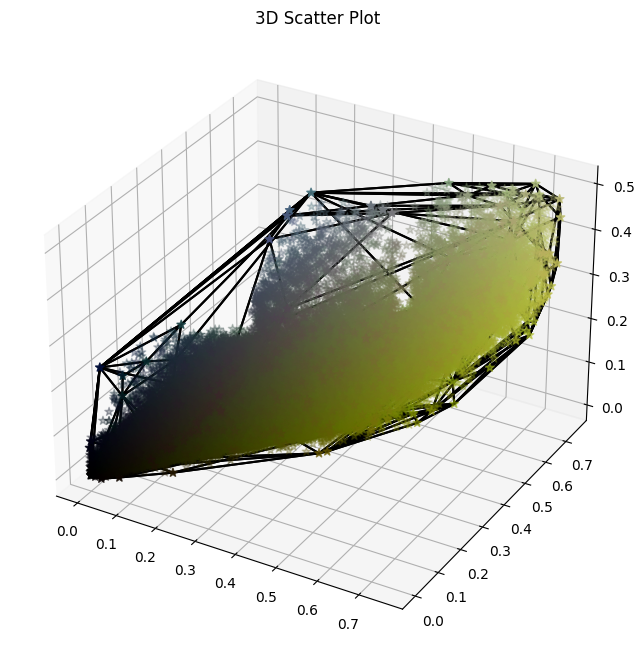

In [32]:
#input_image_path=f'/Users/zhxzhang/DataspellProjects/Image_Dataset/test_image_dataset/nesi.png'
output_rawhull_obj_file=f"../LoCoPalette_Result/LosAngeles_Result/LosAngeles_0000805_2019_04_254_34.05413661704147_-118.2561985634712_jkRksha1SNsj0H6UjgY5UA-rawconvexhull.obj"
js_output_file=f"E:/pythonproject/color_harmony/LoCoPalette_Result/LosAngeles_Result/LosAngeles_0000805_2019_04_254_34.05413661704147_-118.2561985634712_jkRksha1SNsj0H6UjgY5UA-final_simplified_hull.js"
js_output_clip_file=f"E:/pythonproject/color_harmony/LoCoPalette_Result/LosAngeles_Result/LosAngeles_0000805_2019_04_254_34.05413661704147_-118.2561985634712_jkRksha1SNsj0H6UjgY5UA-final_simplified_hull_clip.js"
js_output_file_origin=f"../LoCoPalette_Result/LosAngeles_Result/LosAngeles_0000805_2019_04_254_34.05413661704147_-118.2561985634712_jkRksha1SNsj0H6UjgY5UA-original_hull.js"
if_exitandcreate(output_rawhull_obj_file)
if_exitandcreate(js_output_file)
if_exitandcreate(js_output_clip_file)
if_exitandcreate(js_output_file_origin)
#try:
    #from time import process_time as clock
## Python 2 compatibility
#except ImportError:
    #from time import clock
#start_time=clock()

#images=np.asfarray(Image.open(input_image_path).convert('RGB')).reshape((-1,3))
#img_ravel = img.reshape(-1,3)
hull=ConvexHull(rgb)
origin_hull=hull
visualize_hull(origin_hull)



In [33]:
write_convexhull_into_obj_file(hull, output_rawhull_obj_file)



E_vertice_num= 8


N=1000
mesh=TriMesh.FromOBJ_FileName(output_rawhull_obj_file)
print( 'original vertices number:',len(mesh.vs) )


for i in range(N):

    # print 'loop:', i

    old_num=len(mesh.vs)
    mesh=TriMesh.FromOBJ_FileName(output_rawhull_obj_file)
    mesh=remove_one_edge_by_finding_smallest_adding_volume_with_test_conditions(mesh,option=2)
    newhull=ConvexHull(mesh.vs)
    write_convexhull_into_obj_file(newhull, output_rawhull_obj_file)

    # print 'current vertices number:', len(mesh.vs)

    if len(newhull.vertices) == E_vertice_num:
        import json, os
        name = os.path.splitext( js_output_file )[0] + ( '-%02d.js' % len(newhull.vertices ))
        with open( name, 'w' ) as myfile:
            json.dump({'vs': newhull.points[ newhull.vertices ].tolist(),'faces': newhull.points[ newhull.simplices ].tolist()}, myfile, indent = 4 )

        name = os.path.splitext( js_output_clip_file )[0] + ( '-%02d.js' % len(newhull.vertices ))
        with open( name, 'w' ) as myfile:
            json.dump({'vs': newhull.points[ newhull.vertices ].clip(0.0,255.0).tolist(),'faces': newhull.points[ newhull.simplices ].clip(0.0,255.0).tolist()}, myfile, indent = 4 )

        pigments_colors=newhull.points[ newhull.vertices ].clip(0,255).round().astype(np.uint8)
        pigments_colors=pigments_colors.reshape((pigments_colors.shape[0],1,pigments_colors.shape[1]))
        Image.fromarray( pigments_colors ).save( os.path.splitext( js_output_clip_file )[0] + ( '-%02d.png' % len(newhull.vertices )) )


    if len(mesh.vs)==old_num or len(mesh.vs)<=E_vertice_num:
        print( 'final vertices number', len(mesh.vs) )
        break



newhull=ConvexHull(mesh.vs)
write_convexhull_into_obj_file(newhull, output_rawhull_obj_file)
# print newhull.points[newhull.vertices]


# import json
# with open( js_output_file, 'w' ) as myfile:
#     json.dump({'vs': newhull.points[ newhull.vertices ].tolist(),'faces': newhull.points[ newhull.simplices ].tolist()}, myfile, indent = 4 )

with open( js_output_file_origin, 'w' ) as myfile_origin:
    json.dump({'vs': origin_hull.points[ origin_hull.vertices ].tolist(),'faces': origin_hull.points[ origin_hull.simplices ].tolist()}, myfile_origin, indent = 4 )




#end_time=clock()

#print( 'time: ', end_time-start_time )

original vertices number: 76
final vertices number 8


In [34]:
ori_colors = (origin_hull.points[origin_hull.vertices] / 255).reshape(1,-1,3)

In [35]:
plt.imshow(ori_colors),plt.axis('off')
plt.imshow

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

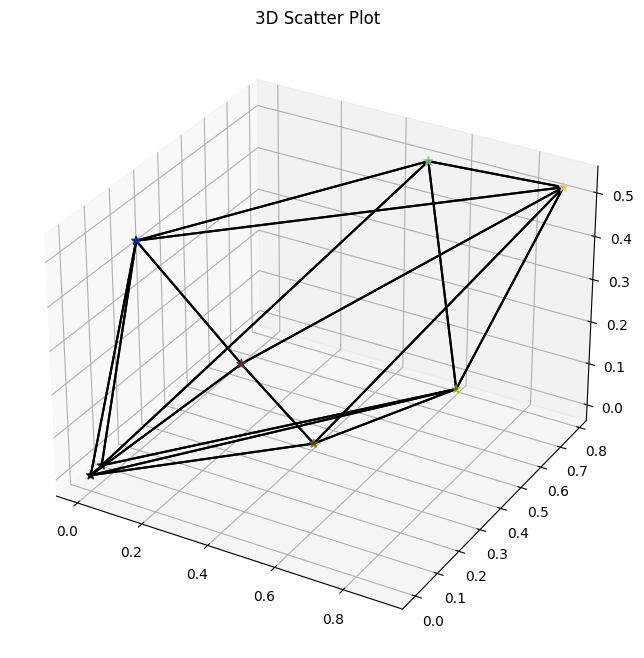

In [36]:
visualize_hull(newhull)

In [4]:
def perceived_brightness(rgb_color):
    r, g, b = rgb_color[:,0],rgb_color[:,1],rgb_color[:,2]
    return np.sqrt(0.299 * r**2 + 0.587 * g**2 + 0.114 * b**2)

def sort_colors_by_brightness(rgb_array):
    # Calculate the perceived brightness for each color in the RGB array
    brightness_values = perceived_brightness(rgb_array)
    #print(brightness_values)
    # Sort the RGB array based on the calculated brightness values
    sorted_rgb_array = [color for _, color in sorted(zip(brightness_values, rgb_array))]

    return np.array(sorted_rgb_array)

In [5]:
import glob
import PIL

In [61]:
files = glob.glob('../LoCoPalette_Result/Boston_Result/*clip-08.js',recursive = True)
images = glob.glob('E:/dataset/color_harmony_dataset/5/Boston/Original/*.jpg',recursive = True)

In [62]:
city_color_list = []
for file in files:
    json_data = open(file)
    city = json.load(json_data)['vs']
    json_data.close()
    sorted_city = sort_colors_by_brightness(np.array(city))
    city_color_list.append(sorted_city)



In [63]:
colors = np.array(city_color_list) /255

In [64]:
image = np.asarray(PIL.Image.open(images[0]))

In [65]:
img = Image.fromarray(colors[0].reshape(1,-1,3), 'RGB')

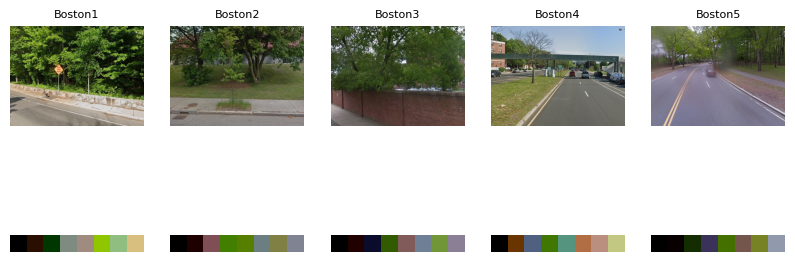

In [66]:
plt.figure(figsize=(10,4))
for i in range(len(images)):
    plt.subplot(2, len(images), i+1)

    image = np.asarray(PIL.Image.open(images[i]))
    plt.imshow(image)
    plt.title(f'Boston{i+1}',fontsize = 8)
    plt.axis('off')


#plt.figure(figsize=(10,4))
for j in range(len(colors)):
    plt.subplot(2, len(images), j+1+len(images))
    plt.imshow(colors[j].reshape(1,-1,3))
    #plt.title(f'LA{1}',fontsize = 8)
    plt.axis('off')


plt.savefig('../LoCoPalette_Result/Boston_Result/Boston_color_palette.png')


plt.show()

In [21]:
root_Dir = glob.glob('./LoCoPalette_Result/Boston_Result/*original_hull.js')

In [22]:
origin_hull = []

for dir in root_Dir:
    json_loader = open(dir)
    hull = json.load(json_loader) ['vs']
    origin_hull.append(hull)

In [23]:
for hulls in origin_hull:
    print(
        [0.0,0.0,0.0] in hulls
    )

False
True
False
False
True


In [26]:
origin_hull[3]

[[35.0, 56.0, 0.0],
 [1.0, 11.0, 0.0],
 [0.0, 7.0, 0.0],
 [38.0, 60.0, 22.0],
 [37.0, 55.0, 33.0],
 [5.0, 18.0, 0.0],
 [16.0, 34.0, 0.0],
 [27.0, 39.0, 37.0],
 [39.0, 50.0, 52.0],
 [50.0, 62.0, 62.0],
 [0.0, 2.0, 5.0],
 [0.0, 8.0, 11.0],
 [19.0, 38.0, 0.0],
 [8.0, 23.0, 0.0],
 [47.0, 56.0, 0.0],
 [6.0, 5.0, 0.0],
 [1.0, 1.0, 0.0],
 [3.0, 2.0, 18.0],
 [0.0, 4.0, 0.0],
 [31.0, 28.0, 57.0],
 [35.0, 32.0, 61.0],
 [62.0, 44.0, 34.0],
 [36.0, 20.0, 21.0],
 [30.0, 16.0, 15.0],
 [21.0, 13.0, 2.0],
 [17.0, 14.0, 0.0],
 [27.0, 17.0, 7.0],
 [36.0, 23.0, 33.0],
 [61.0, 41.0, 40.0],
 [55.0, 70.0, 1.0],
 [49.0, 77.0, 19.0],
 [50.0, 67.0, 0.0],
 [46.0, 72.0, 9.0],
 [63.0, 89.0, 15.0],
 [51.0, 72.0, 0.0],
 [62.0, 83.0, 4.0],
 [69.0, 83.0, 8.0],
 [101.0, 126.0, 61.0],
 [93.0, 118.0, 60.0],
 [113.0, 127.0, 39.0],
 [117.0, 127.0, 41.0],
 [112.0, 122.0, 35.0],
 [119.0, 128.0, 47.0],
 [120.0, 128.0, 53.0],
 [116.0, 128.0, 44.0],
 [71.0, 91.0, 6.0],
 [114.0, 128.0, 43.0],
 [75.0, 103.0, 28.0],
 [77.0, 105.0

LA1 don't have 0,0,0, but we get 0,1,0 and 0,2,0

SF2 and SF4 don't have 0,0,0, but we get SF2 1,3,0 and 3,4,2 and 0,1,2 and 0,4,0
SF4 0,3,0 and 0,1,0

Bos1 Bos3 Bos4 don't have 0,0,0, but we get Bos1 0,4,0 0,3,2

Bos3 get 0,0,2 3,0,0

Bos4 get 0,4,0 and 1,1,0

